<a href="https://colab.research.google.com/github/Yash-Jaiswal28/Deep-Learning/blob/main/Keras_hyperparamter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
df.corr()['Outcome'] #Give the correlation of each column with the Outcome column

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [57]:
X = df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
X = scaler.fit_transform(X)
X.shape

(768, 8)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [61]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
model=Sequential()
model.add(Dense(units=32,activation='relu',input_dim=8))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
history=model.fit(X_train,y_train, batch_size=32, epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 0.7051 - accuracy: 0.5114 - val_loss: 0.6524 - val_accuracy: 0.6169
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.6384 - val_loss: 0.6129 - val_accuracy: 0.6948
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6195 - accuracy: 0.6922 - val_loss: 0.5792 - val_accuracy: 0.7532
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5883 - accuracy: 0.7231 - val_loss: 0.5521 - val_accuracy: 0.7662
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5632 - accuracy: 0.7329 - val_loss: 0.5311 - val_accuracy: 0.7987
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5432 - accuracy: 0.7443 - val_loss: 0.5121 - val_accuracy: 0.7987
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.7573 - val_loss: 0.4995 - val_accuracy: 0.7857
Epoch 8/100


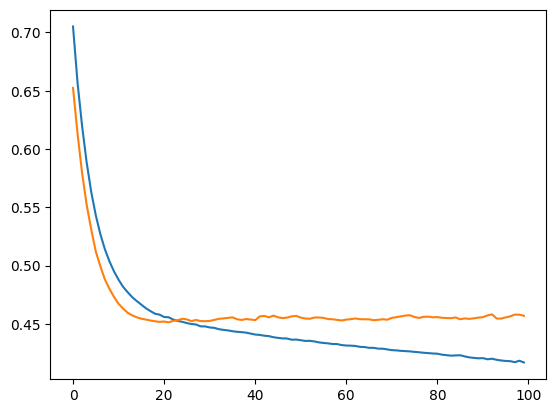

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

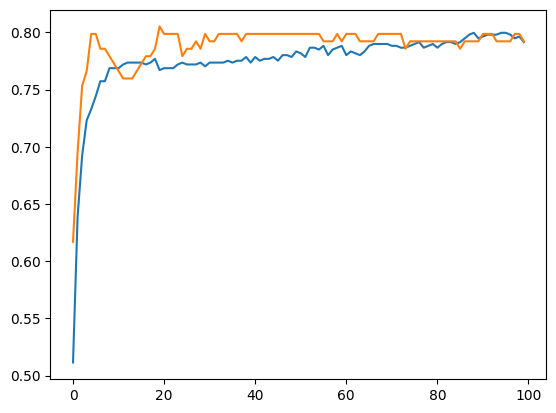

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## Finding the Best Optimizer

In [66]:
!pip install keras_tuner

In [67]:
import keras_tuner as kt

In [68]:
def build_model(hp):
  model =Sequential()
  model.add(Dense(units=32,activation='relu',input_dim=8))
  model.add(Dense(1,activation='sigmoid'))

  optimizer=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta'])
  model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])

  return model


In [69]:
tuner = kt.RandomSearch(build_model,
                         objective='val_accuracy',
                         max_trials=5)

Reloading Tuner from ./untitled_project/tuner0.json


In [70]:
tuner.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

In [71]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
optimizer: rmsprop
Score: 0.8116883039474487

Trial 3 summary
Hyperparameters:
optimizer: adam
Score: 0.8051947951316833

Trial 1 summary
Hyperparameters:
optimizer: adadelta
Score: 0.6883116960525513

Trial 0 summary
Hyperparameters:
optimizer: sgd
Score: 0.649350643157959


In [72]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [73]:
model = tuner.get_best_models(num_models=1)[0]

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
model.fit(X_train,y_train,batch_size=32,initial_epoch=10,epochs=100,validation_data=(X_test,y_test))

Epoch 11/100
20/20 [==============================] - 1s 11ms/step - loss: 0.4963 - accuracy: 0.7459 - val_loss: 0.4963 - val_accuracy: 0.8052
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4863 - accuracy: 0.7508 - val_loss: 0.4890 - val_accuracy: 0.8182
Epoch 13/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4786 - accuracy: 0.7638 - val_loss: 0.4844 - val_accuracy: 0.8182
Epoch 14/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4724 - accuracy: 0.7655 - val_loss: 0.4800 - val_accuracy: 0.8182
Epoch 15/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4675 - accuracy: 0.7736 - val_loss: 0.4766 - val_accuracy: 0.8117
Epoch 16/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4636 - accuracy: 0.7687 - val_loss: 0.4759 - val_accuracy: 0.8182
Epoch 17/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4611 - accuracy: 0.7704 - val_loss: 0.4751 - val_accuracy: 0.8182
Epoch

## Number of Nodes

In [76]:
def build_model(hp):
  model=Sequential()
  units= hp.Int('units',min_value=8,max_value=128) #(Lower_limit, upper_limit, Step_size) 8->16->24....

  model.add(Dense(units=units,activation='relu',input_dim=8))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

  return model

In [77]:
tuner= kt.RandomSearch(build_model,
                       objective='val_accuracy',
                       max_trials=5,
                       directory="my_dir",
                       project_name="Number of Nodes")

Reloading Tuner from my_dir/Number of Nodes/tuner0.json


In [78]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [79]:
tuner.results_summary()

Results summary
Results in my_dir/Number of Nodes
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
units: 72
Score: 0.8181818127632141

Trial 0 summary
Hyperparameters:
units: 104
Score: 0.8051947951316833

Trial 4 summary
Hyperparameters:
units: 88
Score: 0.7922077775001526

Trial 1 summary
Hyperparameters:
units: 16
Score: 0.7467532753944397

Trial 2 summary
Hyperparameters:
units: 24
Score: 0.7467532753944397


In [80]:
tuner.get_best_hyperparameters()[0].values

{'units': 72}

In [81]:
model=tuner.get_best_models(num_models=1)[0]

In [82]:
model.fit(X_train,y_train,batch_size=32,initial_epoch=6,epochs=100,validation_data=(X_test,y_test))

Epoch 7/100
20/20 [==============================] - 1s 12ms/step - loss: 0.5136 - accuracy: 0.7573 - val_loss: 0.5032 - val_accuracy: 0.8117
Epoch 8/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4968 - accuracy: 0.7622 - val_loss: 0.4920 - val_accuracy: 0.8052
Epoch 9/100
20/20 [==============================] - 0s 10ms/step - loss: 0.4847 - accuracy: 0.7687 - val_loss: 0.4863 - val_accuracy: 0.8052
Epoch 10/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4756 - accuracy: 0.7704 - val_loss: 0.4807 - val_accuracy: 0.7987
Epoch 11/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4688 - accuracy: 0.7801 - val_loss: 0.4762 - val_accuracy: 0.8182
Epoch 12/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4637 - accuracy: 0.7785 - val_loss: 0.4750 - val_accuracy: 0.8052
Epoch 13/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4599 - accuracy: 0.7801 - val_loss: 0.4740 - val_accuracy: 0.8117
Epoch 1

## All Parameter Tuning(Maybe chances of over-fitting)

In [83]:
def build_model(hp):

  model=Sequential()

  counter=0

  for i in range(hp.Int('num_layers ',min_value=1,max_value=10)):

    if counter==0 :
      model.add(Dense(units=hp.Int('units '+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('activation '+str(i),['relu','tanh','sigmoid']),input_dim=8))
      model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    else :
      model.add(Dense(units=hp.Int('units '+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('activation '+str(i),['relu','tanh','sigmoid'])))
      model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
    counter+=1
  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='binary_crossentropy',optimizer=hp.Choice('optimizer ',values=['adam','sgd','rmsprop','adadelta','nadam']), metrics=['accuracy'])

  return model


In [84]:
tuner= kt.RandomSearch(build_model,
                       objective='val_accuracy',
                       max_trials=3,
                       directory="mydir1",
                       project_name="Final1")

Reloading Tuner from mydir1/Final1/tuner0.json


In [85]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [86]:
tuner.get_best_hyperparameters()[0].values

{'num_layers ': 5,
 'units 0': 56,
 'activation 0': 'tanh',
 'dropout0': 0.4,
 'optimizer ': 'nadam',
 'units 1': 8,
 'activation 1': 'relu',
 'dropout1': 0.1,
 'units 2': 8,
 'activation 2': 'relu',
 'dropout2': 0.1,
 'units 3': 8,
 'activation 3': 'relu',
 'dropout3': 0.1,
 'units 4': 8,
 'activation 4': 'relu',
 'dropout4': 0.1}

In [87]:
model=tuner.get_best_models(num_models=1)[0]

In [88]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20)


In [89]:
history = model.fit(X_train,y_train,initial_epoch=5,epochs=200,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 6/200
20/20 [==============================] - 4s 31ms/step - loss: 0.5470 - accuracy: 0.7117 - val_loss: 0.5062 - val_accuracy: 0.7662
Epoch 7/200
20/20 [==============================] - 0s 7ms/step - loss: 0.5299 - accuracy: 0.6987 - val_loss: 0.4972 - val_accuracy: 0.7922
Epoch 8/200
20/20 [==============================] - 0s 9ms/step - loss: 0.5606 - accuracy: 0.7313 - val_loss: 0.5006 - val_accuracy: 0.8117
Epoch 9/200
20/20 [==============================] - 0s 8ms/step - loss: 0.5344 - accuracy: 0.7134 - val_loss: 0.4987 - val_accuracy: 0.7987
Epoch 10/200
20/20 [==============================] - 0s 4ms/step - loss: 0.5267 - accuracy: 0.7362 - val_loss: 0.4941 - val_accuracy: 0.7987
Epoch 11/200
20/20 [==============================] - 0s 10ms/step - loss: 0.5261 - accuracy: 0.7378 - val_loss: 0.4918 - val_accuracy: 0.8052
Epoch 12/200
20/20 [==============================] - 0s 6ms/step - loss: 0.5153 - accuracy: 0.7541 - val_loss: 0.4868 - val_accuracy: 0.7987
Epoch 13

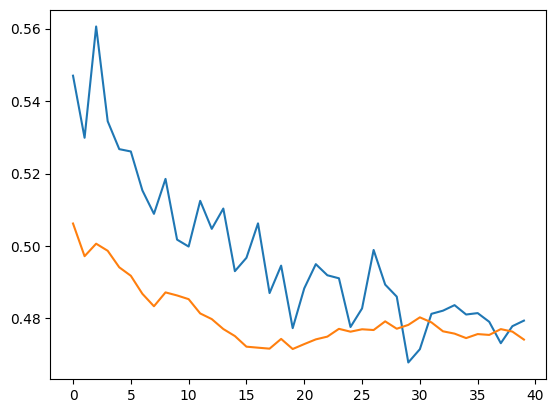

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

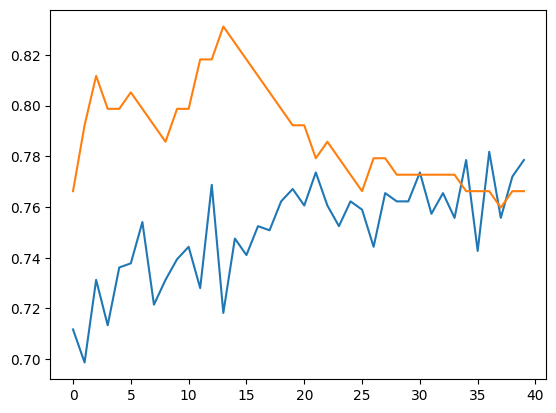

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])